# Simple moving average model

\begin{equation}
    Y_{t}
    =
    \mu + \epsilon_{t} + \theta \epsilon_{t-1}
\end{equation}

where:
- $\epsilon_{t} \sim \mathcal{N}(0,\sigma^{2}_{\epsilon})$ 
- $\mu$ (mean)
- $\theta$ (slope)
- $\sigma^{2}_{\epsilon}$

#### $\theta=0$ case $\implies$ $Y_{t}$ is a simple white noise process:


\begin{equation}
    Y_{t}
    =
    \mu + \epsilon_{t}
\end{equation}

#### $\theta \neq 0$ case $\implies$ $Y_{t}$ depends on the previous noise $\epsilon_{t-1}$ too (autocorrelation)

\begin{equation}
    Y_{t}
    =
    \mu + \epsilon_{t} + \theta \epsilon_{t-1}
\end{equation}

Only lag 1 autocorrelation $\neq 0$ for the MA model.

## Simulating the simple moving average model

In [1]:
x1 <- arima.sim(model = list(ma=0.5), n = 100)
x2 <- arima.sim(model = list(ma=0.9), n = 100)
x3 <- arima.sim(model = list(ma=-0.5), n = 100)

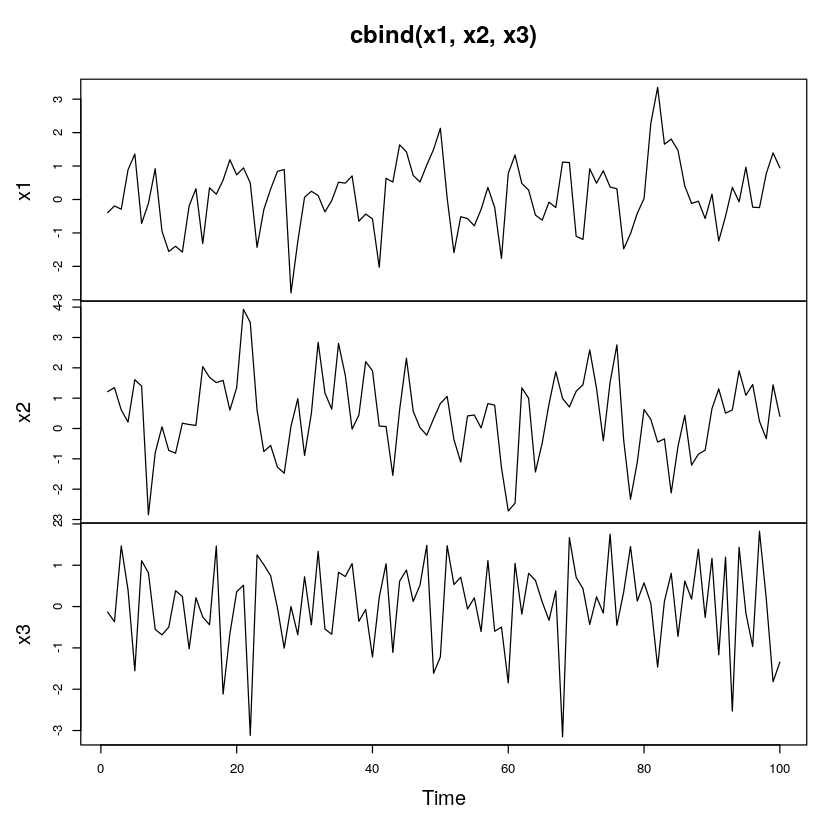

In [3]:
plot.ts(cbind(x1,x2,x3))

### Autocorrelation function - `acf()`

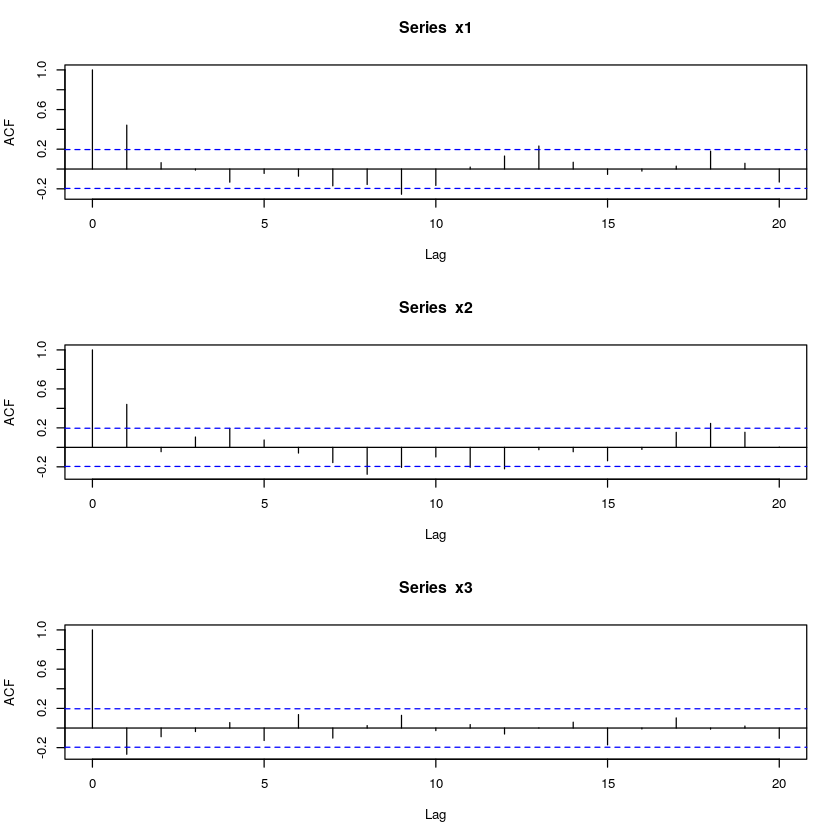

In [9]:
par(mfrow=c(3,1))
acf(x1)
acf(x2)
acf(x3)

## Simple moving average model applied on US inflation data

In [12]:
data(Mishkin, package='Ecdat')
inflation <- as.ts(Mishkin[,1])
inflation_changes <- diff(inflation)

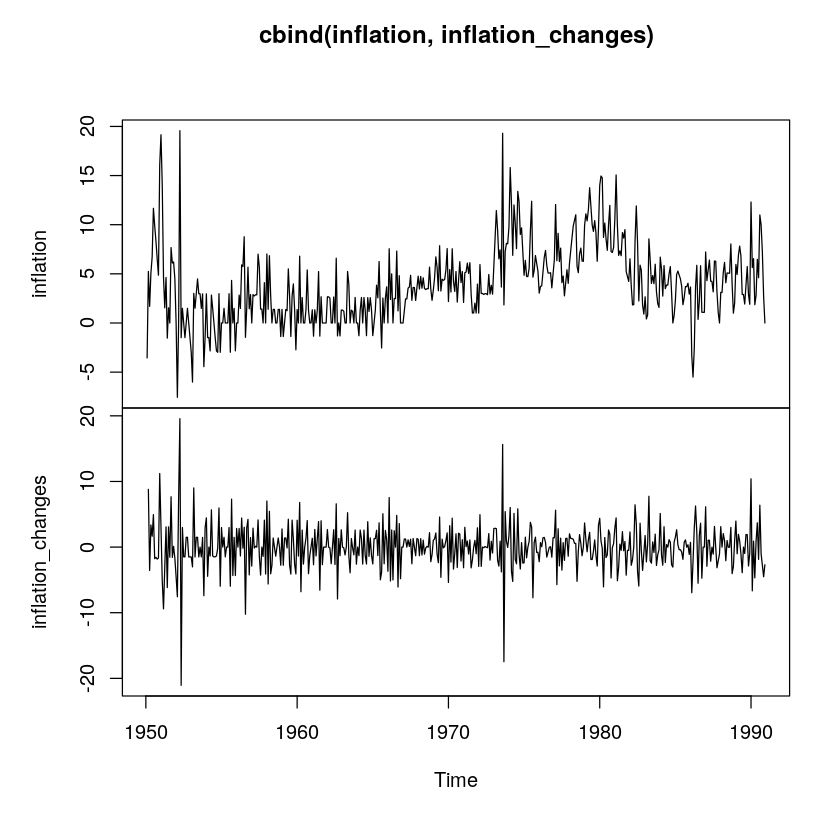

In [16]:
plot.ts(cbind(inflation, inflation_changes))

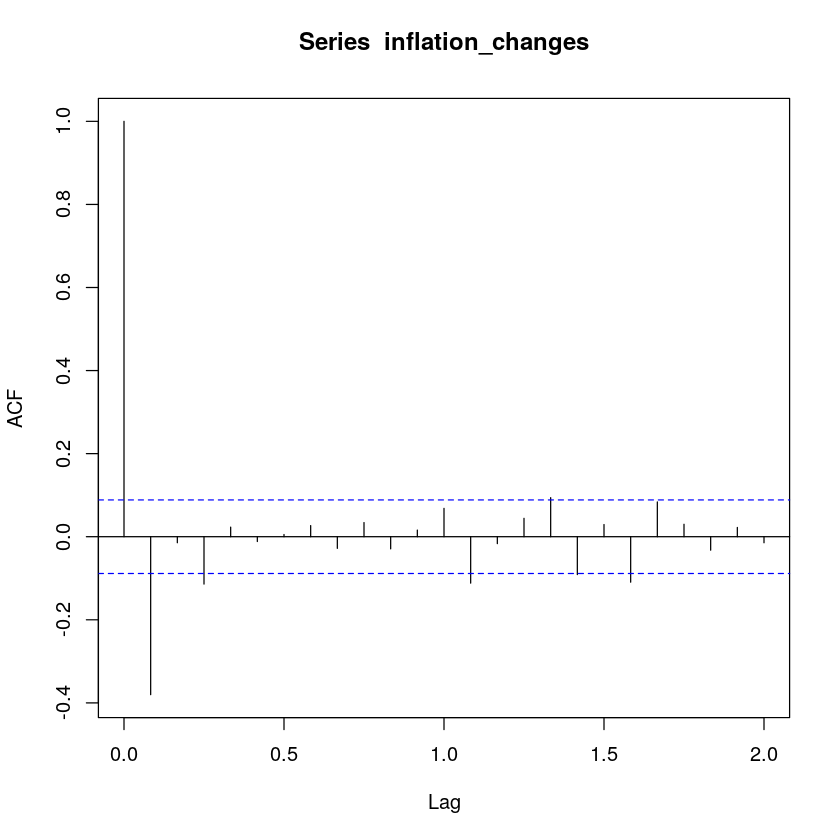

In [17]:
acf(inflation_changes, lag.max=24)

## Fitting a simple moving average model

Simple MA model (=first order) can be fitted using

~~~~
arima(x, order=c(0,0,1))
~~~~

Model estimate:

\begin{equation}
    \hat{Y}_{t}
    =
    \hat{\mu} + \hat{\theta} \hat{\epsilon}_{t-1}
\end{equation}

Residuals:

\begin{equation}
    \hat{\epsilon}_{t}
    =
    Y_{t} - \hat{Y}_{t}
\end{equation}

The predicted values can be expressed as:

\begin{equation}
    \hat{Y}_{t}
    =
    Y_{t}
    -
    \hat{\epsilon}_{t}
\end{equation}

In [18]:
inflation_changes_MA_model <- arima(inflation_changes, order=c(0,0,1))

In [19]:
inflation_changes_MA_model


Call:
arima(x = inflation_changes, order = c(0, 0, 1))

Coefficients:
          ma1  intercept
      -0.7932     0.0010
s.e.   0.0355     0.0281

sigma^2 estimated as 8.882:  log likelihood = -1230.85,  aic = 2467.7

In [22]:
theta <- inflation_changes_MA_model$coef['ma1']
mu <- inflation_changes_MA_model$coef['intercept']
sigma2 <- inflation_changes_MA_model$sigma2

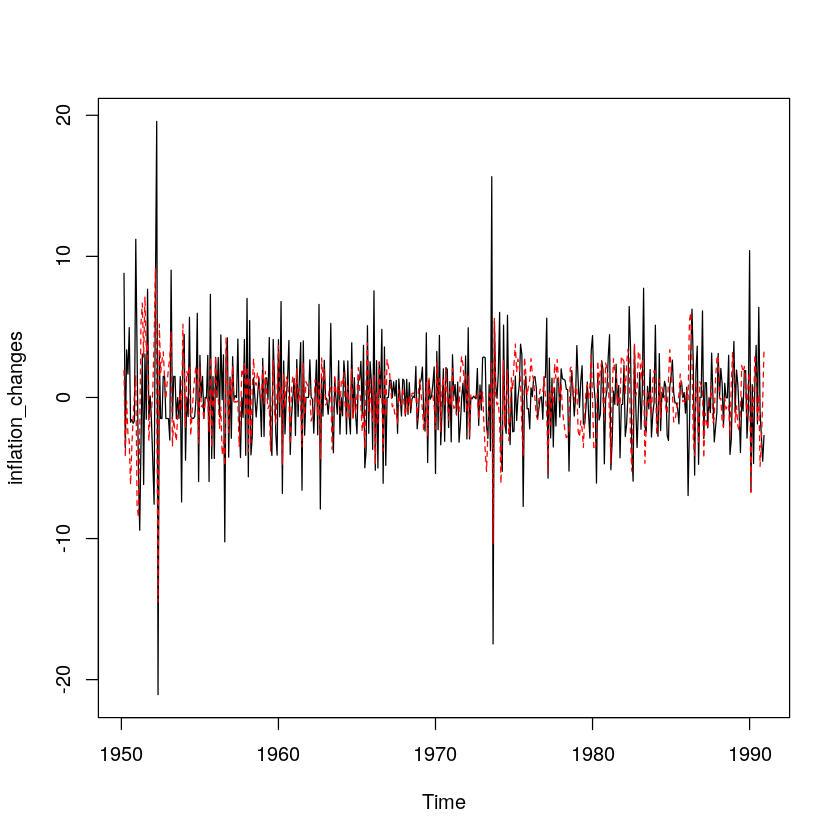

In [26]:
ts.plot(inflation_changes)
inflation_changes_MA_model_mean <- inflation_changes - residuals(inflation_changes_MA_model)
points(inflation_changes_MA_model_mean, type='l', col='red', lty=2)

### Prediction

In [27]:
predict(inflation_changes_MA_model, n.ahead=6)

$pred
             Jan         Feb         Mar         Apr         May         Jun
1991 4.831631501 0.001049346 0.001049346 0.001049346 0.001049346 0.001049346

$se
          Jan      Feb      Mar      Apr      May      Jun
1991 2.980203 3.803826 3.803826 3.803826 3.803826 3.803826


## Fitting the Nile dataset

In [29]:
Nile_MA_model <- arima(Nile, order = cbind(0,0,1))

In [30]:
Nile_MA_model


Call:
arima(x = Nile, order = cbind(0, 0, 1))

Coefficients:
         ma1  intercept
      0.3783   919.2433
s.e.  0.0791    20.9685

sigma^2 estimated as 23272:  log likelihood = -644.72,  aic = 1295.44

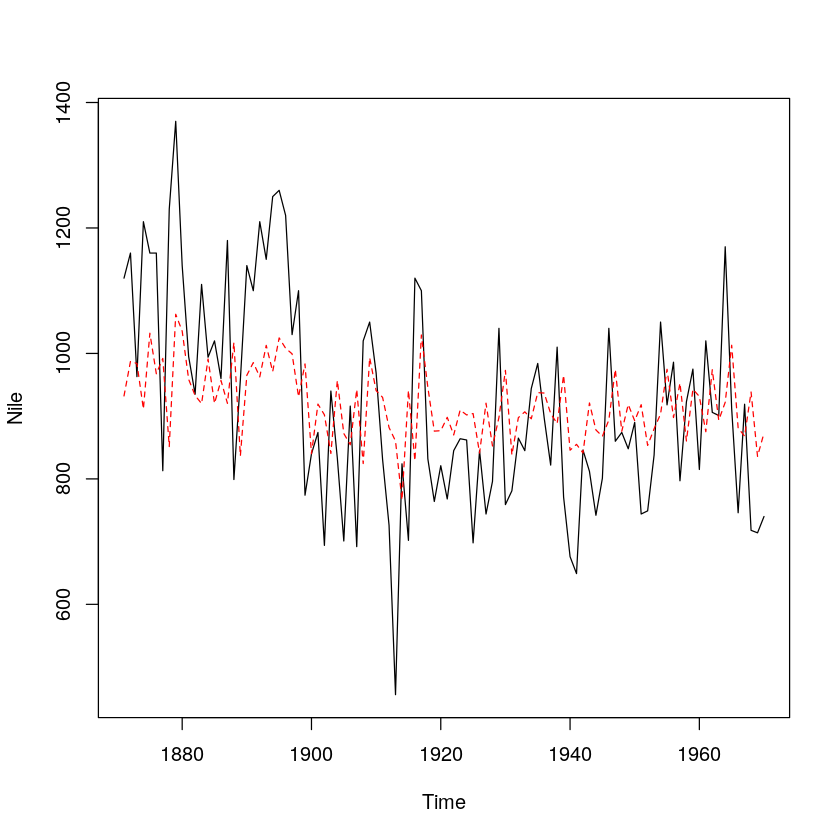

In [31]:
ts.plot(Nile)
Nile_MA_model_mean <- Nile - resid(Nile_MA_model)
points(Nile_MA_model_mean, type = "l", col = 2, lty = 2)

In [32]:
Nile_MA_model_future_pred <- predict(Nile_MA_model, n.ahead=10)

In [33]:
Nile_MA_model_future_pred_mean <- Nile_MA_model_future_pred$pred
Nile_MA_model_future_pred_se   <- Nile_MA_model_future_pred$se

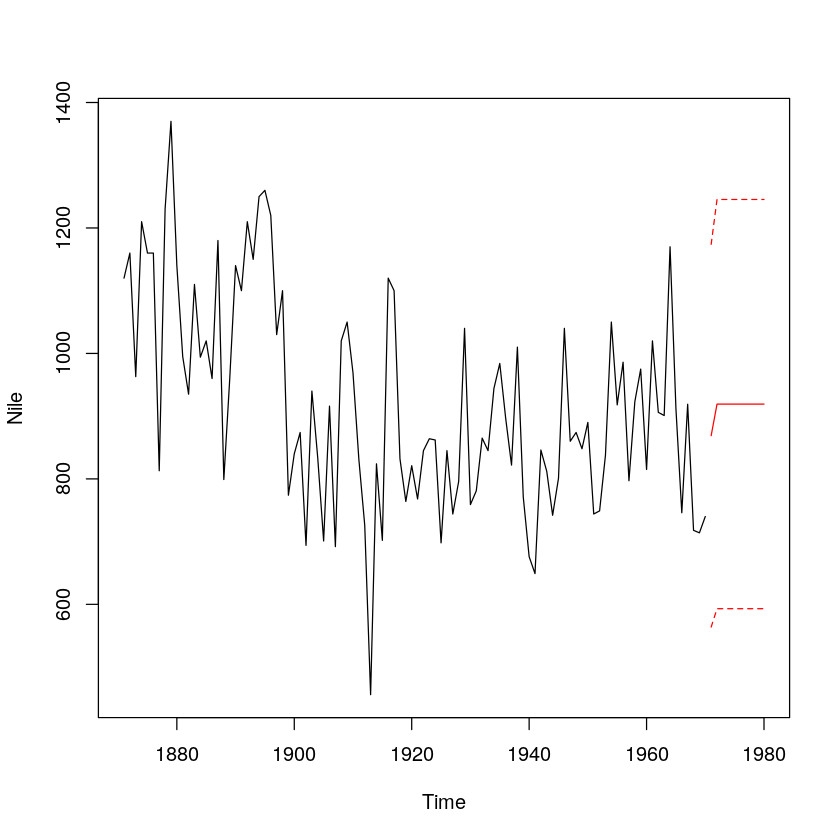

In [34]:
ts.plot(Nile, xlim = c(1871, 1980))
points(Nile_MA_model_future_pred_mean, type = "l", col = 2)
points(Nile_MA_model_future_pred_mean - 2*Nile_MA_model_future_pred_se, type = "l", col = 2, lty = 2)
points(Nile_MA_model_future_pred_mean + 2*Nile_MA_model_future_pred_se, type = "l", col = 2, lty = 2)